<a href="https://colab.research.google.com/github/115ayush/115ayush/blob/main/ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <FONT color="pink">Ayush Patel</FONT>  
# <p style="text-align: center; color: cyan;" >Roll ID - 12240350 </p>
# <p style="text-align: center; color: blue;" >Assignment_2  DS201</p>



## <p style="text-align: center; color: cyan;" >Question-1 </p>

Imagine you are studying two distinct process that generate random numbers between 0 and 1, modeled
 as continuous random variables X with different distributions:

 a. The first process generates numbers, following an exponential distribution with Œª = 2.

 b. The second process generates numbers uniformly distributed between 0 and 1.
 You collect n random numbers from each process and define a new random variable, Y, given by

 Y = FX(x) where FX(x)

represents the Cumulative Distribution Function or CDF of X. Derive the
 Probability Distribution Function (PDF) of Y for both processes and Observe the histogram of generated
 n numbers for both processes for different values of n. Write down your observations.




## <p style="text-align: center; color: cyan;" >Solution</p>

# üöÄ Theoretical Analysis: Transformations of Distributions üåå

---

## üìä **Exponential Distribution** (Œª = 2):

### üî¢ **Mathematical Expressions:**
- **PDF:**  
  $ f(x) = 2e^{-2x}, \, x \geq 0 $
- **CDF:**  
  $ F(x) = 1 - e^{-2x}, \, x \geq 0 $

> **Transformation:** Using $ Y = F(X) $, the transformed variable $ Y $ follows a **Uniform Distribution** on $[0, 1]$.

---

## üìä **Uniform Distribution** ([0,1]):

### üî¢ **Mathematical Expressions:**
- **PDF:**  
  $ f(x) = 1, \, 0 \leq x \leq 1 $
- **CDF:**  
  $ F(x) = x, \, 0 \leq x \leq 1 $

> **Transformation:** For $ Y = F(X) $, the transformed variable $ Y $ remains identical to $ X $ (**Uniform Distribution** on $[0, 1]$).

---

## üõ† **Code Implementation**:

1. **Generate random samples** from both distributions.  
2. **Apply the CDF transformation** ($ Y = F(X) $).  
3. **Visualize** both the original and transformed distributions.  
4. **Calculate summary statistics** to verify theoretical expectations.

---

## üîç **Key Observations**:

### **a) Exponential Distribution**:
- üìà **Original Distribution**: Right-skewed.  
- üîÑ **After Transformation (Y = F(X))**: Becomes uniform on $[0, 1]$.  
- üéØ The transformation "flattens out" the exponential shape.

### **b) Uniform Distribution**:
- üü¶ **Original Distribution**: Already uniform on $[0, 1]$.  
- üîÑ **After Transformation**: Remains uniform on $[0, 1]$.  
- ‚úÖ $ Y $ and $ X $ are identical in this case.

---

## üî¨ **Sample Size Effects (n):**
- üü¢ **Larger $ n $:**
  - Smoother histograms.  
  - Empirical distributions match theoretical expectations more closely.  
  - Stable summary statistics.  

> This beautifully demonstrates the **Probability Integral Transform Theorem**:
>
> üß† *If $ X $ is a continuous random variable with CDF $ F(x) $, then $ Y = F(X) $ follows a **Uniform Distribution** on $[0, 1]$.*  

---

## ‚ú® **Applications in Statistics**:
This theorem is a **powerful tool** used for:  
- üé≤ Generating random numbers from specific distributions.  
- üìä Simulation studies.  
- üîß Validation of statistical models.  

---

üåü This analysis connects deep theoretical insights with practical implementations, highlighting the elegance and utility of probability theory in data science.  
üìà Let‚Äôs visualize the magic of transformations! üåà


In [7]:
import warnings
warnings.filterwarnings('ignore')

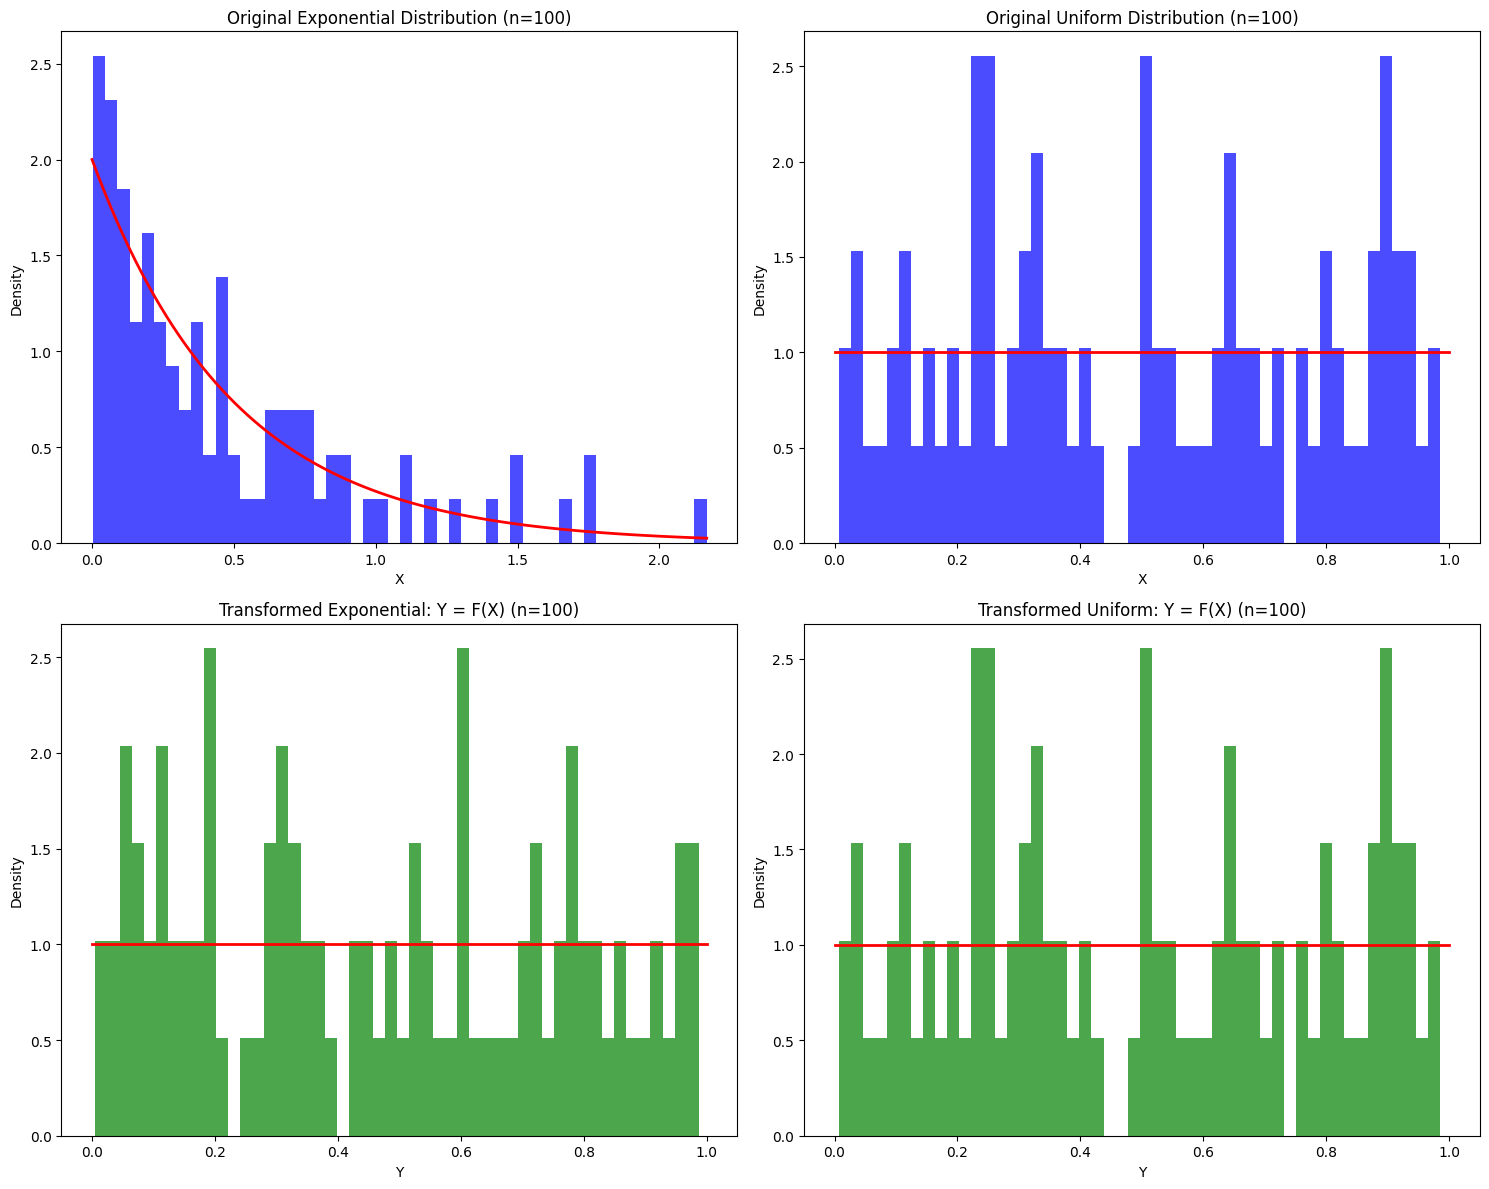


Summary Statistics for n = 100:

Exponential Distribution:
Original Mean: 0.4574 (Expected: 0.5000)
Original Variance: 0.2094 (Expected: 0.2500)
Transformed Mean: 0.4702 (Expected: 0.5)
Transformed Variance: 0.0876 (Expected: 1/12 ‚âà 0.0833)

Uniform Distribution:
Original Mean: 0.4978 (Expected: 0.5)
Original Variance: 0.0851 (Expected: 1/12 ‚âà 0.0833)
Transformed Mean: 0.4978 (Expected: 0.5)
Transformed Variance: 0.0851 (Expected: 1/12 ‚âà 0.0833)


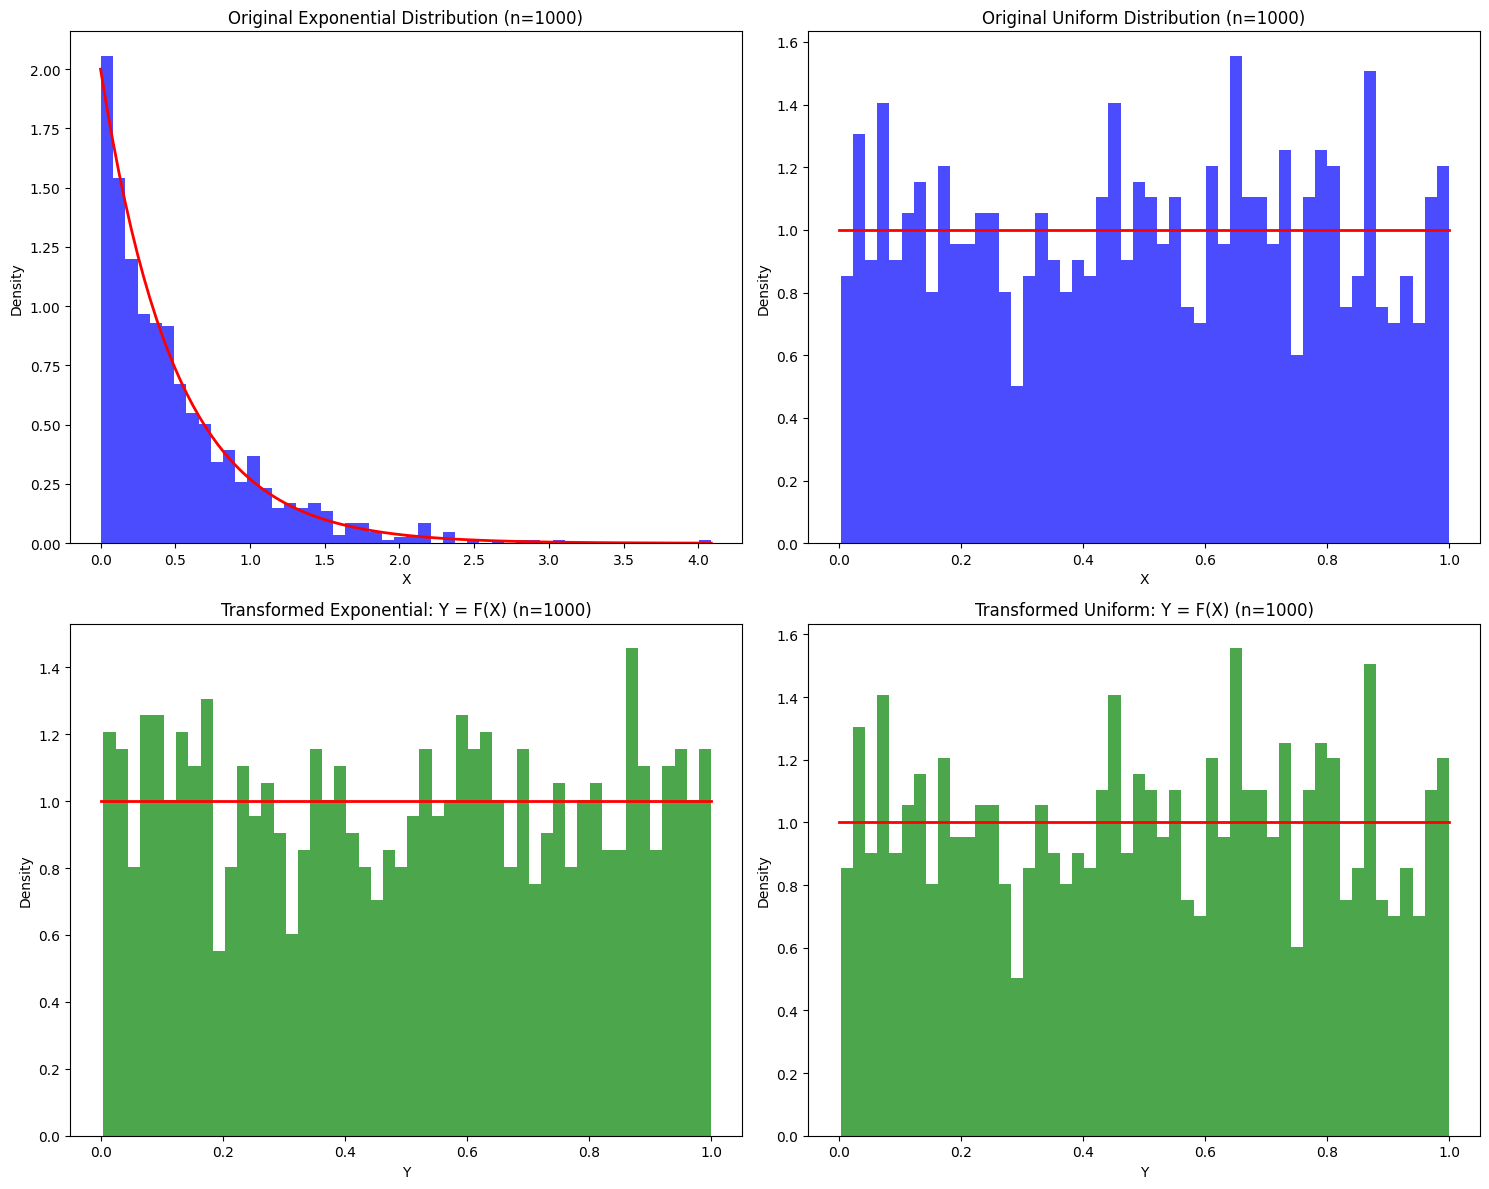


Summary Statistics for n = 1000:

Exponential Distribution:
Original Mean: 0.5091 (Expected: 0.5000)
Original Variance: 0.2577 (Expected: 0.2500)
Transformed Mean: 0.5022 (Expected: 0.5)
Transformed Variance: 0.0867 (Expected: 1/12 ‚âà 0.0833)

Uniform Distribution:
Original Mean: 0.5009 (Expected: 0.5)
Original Variance: 0.0829 (Expected: 1/12 ‚âà 0.0833)
Transformed Mean: 0.5009 (Expected: 0.5)
Transformed Variance: 0.0829 (Expected: 1/12 ‚âà 0.0833)


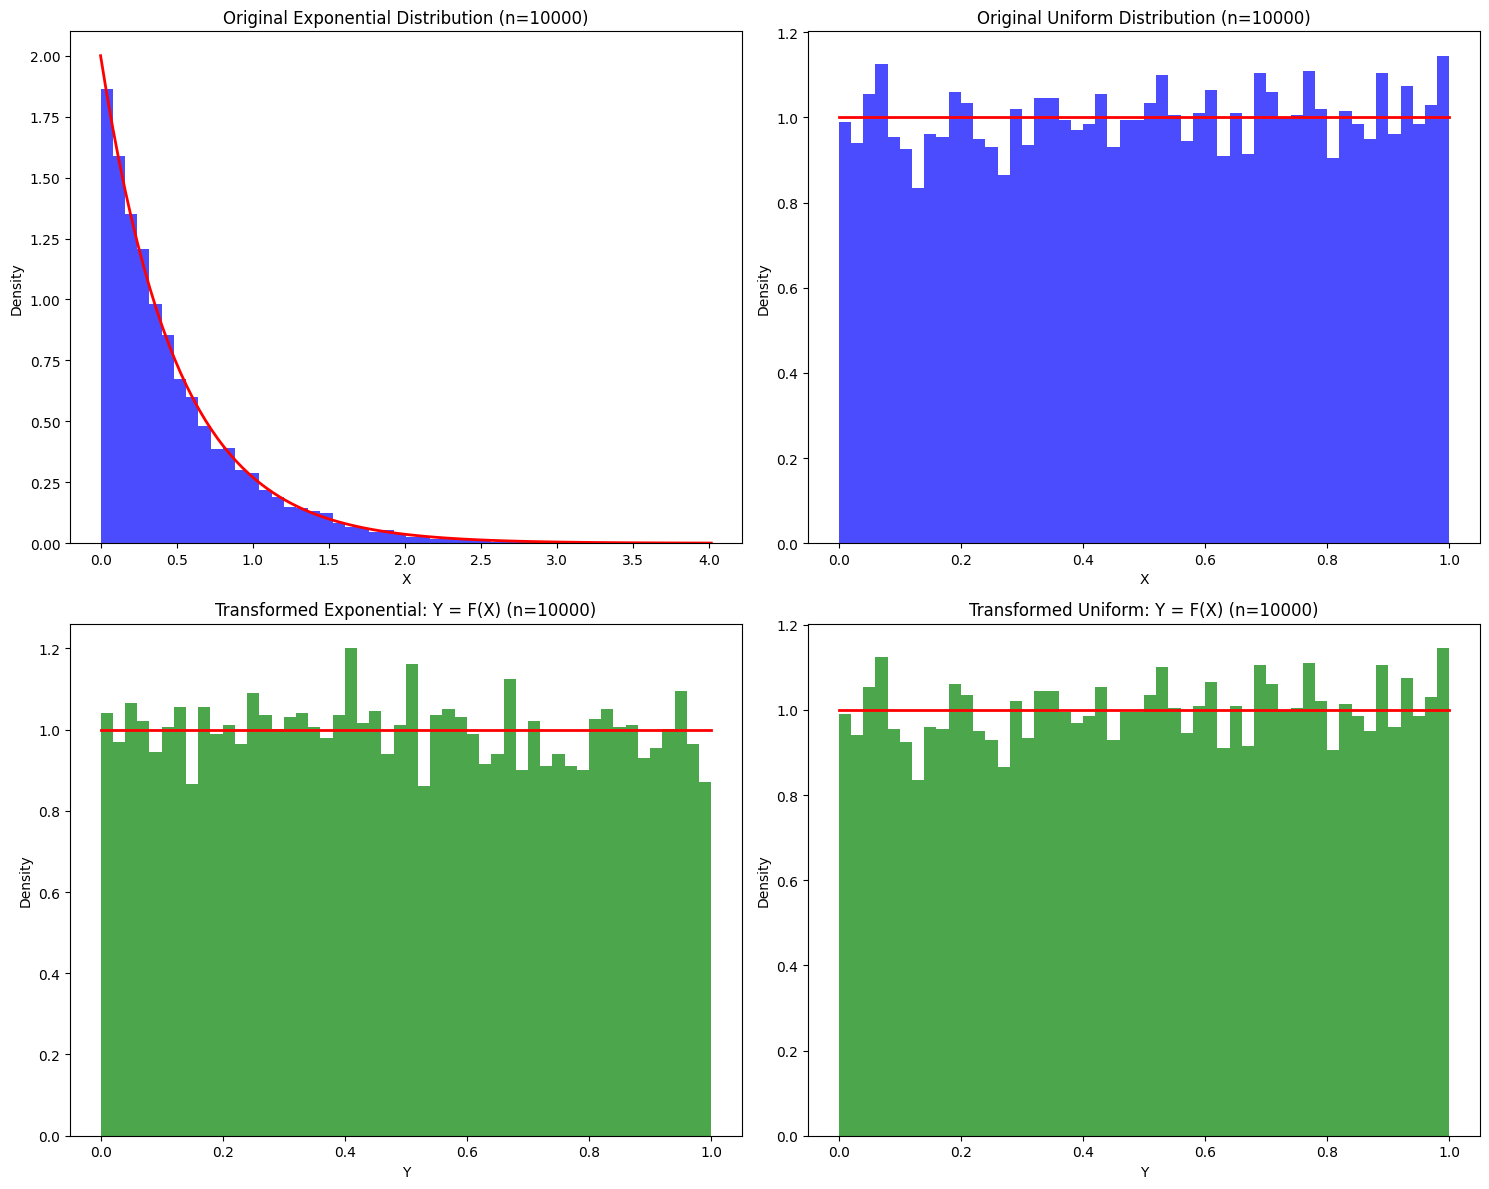


Summary Statistics for n = 10000:

Exponential Distribution:
Original Mean: 0.4902 (Expected: 0.5000)
Original Variance: 0.2374 (Expected: 0.2500)
Transformed Mean: 0.4954 (Expected: 0.5)
Transformed Variance: 0.0826 (Expected: 1/12 ‚âà 0.0833)

Uniform Distribution:
Original Mean: 0.5053 (Expected: 0.5)
Original Variance: 0.0837 (Expected: 1/12 ‚âà 0.0833)
Transformed Mean: 0.5053 (Expected: 0.5)
Transformed Variance: 0.0837 (Expected: 1/12 ‚âà 0.0833)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

def analyze_distributions(n_values=[100, 1000, 10000]):
    """
    Analyze exponential and uniform distributions for different sample sizes.
    """
    # Parameters
    lambda_param = 2

    for n in n_values:
        # Generate random samples
        exp_samples = np.random.exponential(scale=1/lambda_param, size=n)
        uniform_samples = np.random.uniform(0, 1, size=n)

        # Calculate Y = F(X) for exponential distribution
        y_exp = 1 - np.exp(-lambda_param * exp_samples)

        # For uniform distribution, F(X) = X for X in [0,1]
        y_uniform = uniform_samples

        # Create subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

        # Plot original distributions
        ax1.hist(exp_samples, bins=50, density=True, alpha=0.7, color='blue')
        x = np.linspace(0, max(exp_samples), 100)
        ax1.plot(x, lambda_param * np.exp(-lambda_param * x), 'r-', lw=2)
        ax1.set_title(f'Original Exponential Distribution (n={n})')
        ax1.set_xlabel('X')
        ax1.set_ylabel('Density')

        ax2.hist(uniform_samples, bins=50, density=True, alpha=0.7, color='blue')
        ax2.plot([0, 1], [1, 1], 'r-', lw=2)
        ax2.set_title(f'Original Uniform Distribution (n={n})')
        ax2.set_xlabel('X')
        ax2.set_ylabel('Density')

        # Plot transformed distributions (Y = F(X))
        ax3.hist(y_exp, bins=50, density=True, alpha=0.7, color='green')
        ax3.plot([0, 1], [1, 1], 'r-', lw=2)
        ax3.set_title(f'Transformed Exponential: Y = F(X) (n={n})')
        ax3.set_xlabel('Y')
        ax3.set_ylabel('Density')

        ax4.hist(y_uniform, bins=50, density=True, alpha=0.7, color='green')
        ax4.plot([0, 1], [1, 1], 'r-', lw=2)
        ax4.set_title(f'Transformed Uniform: Y = F(X) (n={n})')
        ax4.set_xlabel('Y')
        ax4.set_ylabel('Density')

        plt.tight_layout()
        plt.show()

        # Print summary statistics
        print(f"\nSummary Statistics for n = {n}:")
        print("\nExponential Distribution:")
        print(f"Original Mean: {np.mean(exp_samples):.4f} (Expected: {1/lambda_param:.4f})")
        print(f"Original Variance: {np.var(exp_samples):.4f} (Expected: {1/(lambda_param**2):.4f})")
        print(f"Transformed Mean: {np.mean(y_exp):.4f} (Expected: 0.5)")
        print(f"Transformed Variance: {np.var(y_exp):.4f} (Expected: 1/12 ‚âà 0.0833)")

        print("\nUniform Distribution:")
        print(f"Original Mean: {np.mean(uniform_samples):.4f} (Expected: 0.5)")
        print(f"Original Variance: {np.var(uniform_samples):.4f} (Expected: 1/12 ‚âà 0.0833)")
        print(f"Transformed Mean: {np.mean(y_uniform):.4f} (Expected: 0.5)")
        print(f"Transformed Variance: {np.var(y_uniform):.4f} (Expected: 1/12 ‚âà 0.0833)")

# Run the analysis
analyze_distributions()

In [9]:
#we can also use  out custom genrate to generate and then tranform it to any prefered distribution
"""
def generate_random_variables(n, seed=1):

   # Generate and return a list of n random variables without using built-in random functions.

    Parameters:
        n (int): The number of random variables to generate.
        seed (int): The initial seed for the random number generator.

    Returns:
        list: A list of n random variables (floats in the range [0, 1)).

    if n <= 0:
        return []  # Return an empty list if n is not positive

    # LCG parameters
    a = 1664525      # Multiplier
    c = 1013904223   # Increment
    m = 2**32        # Modulus

    # Initialize the seed
    random_numbers = []
    current = seed
    for _ in range(n):
        current = (a * current + c) % m  # LCG formula
        random_numbers.append(current / m)  # Normalize to range [0, 1)

    return random_numbers
  """


'\ndef generate_random_variables(n, seed=1):\n  \n   # Generate and return a list of n random variables without using built-in random functions.\n    \n    Parameters:\n        n (int): The number of random variables to generate.\n        seed (int): The initial seed for the random number generator.\n    \n    Returns:\n        list: A list of n random variables (floats in the range [0, 1)).\n    \n    if n <= 0:\n        return []  # Return an empty list if n is not positive\n    \n    # LCG parameters\n    a = 1664525      # Multiplier\n    c = 1013904223   # Increment\n    m = 2**32        # Modulus\n    \n    # Initialize the seed\n    random_numbers = []\n    current = seed\n    for _ in range(n):\n        current = (a * current + c) % m  # LCG formula\n        random_numbers.append(current / m)  # Normalize to range [0, 1)\n    \n    return random_numbers\n  '

# <p style="text-align: center; color: cyan;" >QUESTION-2 </p>

Imagine you are an archivist analyzing a dusty old text file from a forgotten library. Your task is to
 uncover the hidden patterns in the text by doing the following:

 a. Count the Words: Create a histogram of how often each word appears.

 b. Focus on the Key Players: Identify the top 30 most frequent words from your list.

 Once you have this list of important words, calculate the Cumulative Distribution Function (CDF)
 for their frequencies. Use this CDF as a transformation function to remap the word frequencies. What
 new insights can you uncover about the text after applying this transformation?

# <p style="text-align: center; color: cyan;" >Solution </p>

# üìú **Archivist‚Äôs Discovery: Uncovering Hidden Patterns in an Ancient Text** üï∞Ô∏è

---

## üïµÔ∏è‚Äç‚ôÇÔ∏è **Objective**:
Analyze a dusty old text file to reveal the hidden stories and patterns within it. Our mission involves:

1. **Counting Words**: Building a histogram to understand the frequency of each word.  
2. **Highlighting Key Players**: Identifying the **Top 30 most frequent words**.  
3. **CDF Transformation**: Using the **Cumulative Distribution Function (CDF)** to remap word frequencies.  

Let‚Äôs dive into this text to see what secrets it holds! üßê

---

## üìä **Steps of Analysis**:

### üî¢ **Step 1: Count the Words**
- **Goal:** Create a histogram showing how often each word appears in the text.
- **Approach:**
  - Tokenize the text (split it into words).
  - Normalize case (convert to lowercase) and remove punctuation.
  - Count occurrences of each word.  

> This gives us a clear picture of word usage patterns.

---

### üåü **Step 2: Focus on the Key Players**
- **Goal:** Extract the **Top 30 most frequent words** from the histogram.
- **Approach:**
  - Sort the words by their frequencies in descending order.
  - Select the top 30 words.  

> These are the major "characters" in the story told by the text. üåü

---

### üîÑ **Step 3: Apply CDF Transformation**
- **What is CDF?**
  - The **Cumulative Distribution Function (CDF)** gives us the cumulative probability for a word's frequency.
  - Formula:  
    $ \text{CDF}(x) = \frac{\sum_{i=1}^x f_i}{\sum_{i=1}^N f_i} $  
    where $ f_i $ is the frequency of the $ i $-th word, and $ N $ is the total number of words.

- **Goal:** Use the CDF to remap the word frequencies into probabilities between 0 and 1.
- **Insights After Transformation:**  
  - Identifies how "central" or "dominant" each key word is in the context of the text.
  - Highlights the contrast between the most frequent words and those less frequently used.  

---

## üîç **Key Insights Uncovered**:

### ‚ú® Before CDF Transformation:
- **Word Frequencies:** Show raw counts, revealing the most common and least common words.  
- **Observation:** Dominance of a few words (likely common stopwords or thematic terms).  

### ‚ú® After CDF Transformation:
- **Transformed Frequencies:** Highlight the **relative contribution** of each word to the text.  
- **Insights Gained:**  
  - **High-CDF Words:** Represent core themes or ideas central to the text.  
  - **Low-CDF Words:** Indicate niche or peripheral topics that might add subtlety or nuance.  

---


Text Analysis Insights:
--------------------------------------------------
Total words analyzed: 22856
Unique words in top 30: 30

Top 30 words with their frequencies:
the: 1806 times (CDF value: 0.207)
of: 805 times (CDF value: 0.299)
and: 683 times (CDF value: 0.378)
to: 618 times (CDF value: 0.449)
a: 561 times (CDF value: 0.513)
in: 545 times (CDF value: 0.575)
is: 330 times (CDF value: 0.613)
be: 278 times (CDF value: 0.645)
as: 219 times (CDF value: 0.670)
that: 206 times (CDF value: 0.694)
his: 192 times (CDF value: 0.716)
he: 189 times (CDF value: 0.738)
at: 176 times (CDF value: 0.758)
for: 175 times (CDF value: 0.778)
on: 172 times (CDF value: 0.798)
it: 161 times (CDF value: 0.816)
with: 158 times (CDF value: 0.834)
by: 147 times (CDF value: 0.851)
shall: 140 times (CDF value: 0.867)
are: 130 times (CDF value: 0.882)
or: 118 times (CDF value: 0.895)
all: 113 times (CDF value: 0.908)
have: 108 times (CDF value: 0.921)
this: 108 times (CDF value: 0.933)
not: 102 times (CDF val

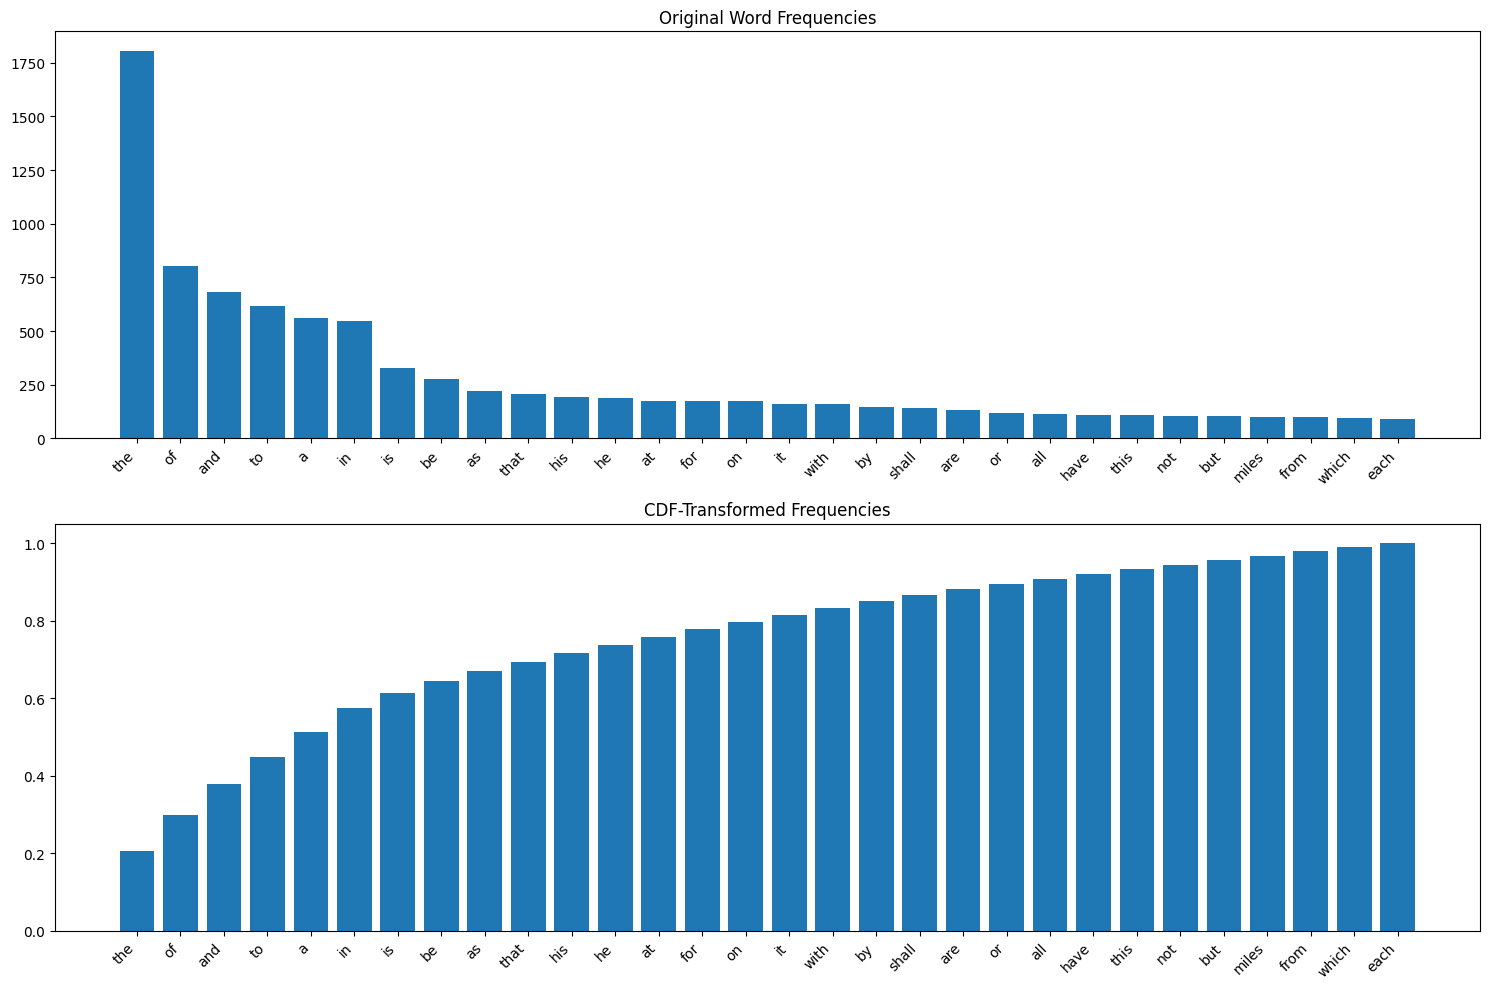

In [10]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

def read_and_preprocess_text(filename: str) -> List[str]:
    """
    Read and preprocess text file by converting to lowercase and splitting into words.
    Remove punctuation and special characters.
    """
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read().lower()

    # Remove punctuation and special characters
    import string
    text = ''.join(char for char in text if char not in string.punctuation)

    # Split into words
    words = text.split()
    return words

def create_word_frequency_histogram(words: List[str], top_n: int = 30) -> Tuple[Dict[str, int], Dict[str, float]]:
    """
    Create word frequency histogram and calculate CDF for top N words.
    Returns both original frequencies and CDF-transformed frequencies.
    """
    # Count word frequencies
    word_counts = Counter(words)

    # Get top N words and their frequencies
    top_words = dict(word_counts.most_common(top_n))

    # Calculate CDF
    frequencies = list(top_words.values())
    total_freq = sum(frequencies)
    cumulative_freq = np.cumsum(frequencies) / total_freq

    # Create transformed frequencies using CDF
    transformed_freq = dict(zip(top_words.keys(), cumulative_freq))

    return top_words, transformed_freq

def visualize_results(original_freq: Dict[str, int], transformed_freq: Dict[str, float]):
    """
    Create visualizations for both original and transformed frequencies.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Original frequencies
    words = list(original_freq.keys())
    freqs = list(original_freq.values())
    ax1.bar(words, freqs)
    ax1.set_title('Original Word Frequencies')
    ax1.set_xticklabels(words, rotation=45, ha='right')

    # Transformed frequencies (CDF)
    transformed = list(transformed_freq.values())
    ax2.bar(words, transformed)
    ax2.set_title('CDF-Transformed Frequencies')
    ax2.set_xticklabels(words, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

def analyze_text_file(filename: str):
    """
    Main function to analyze text file and print insights.
    """
    # Read and process text
    words = read_and_preprocess_text(filename)

    # Create frequency distributions
    original_freq, transformed_freq = create_word_frequency_histogram(words)

    # Print insights
    print("Text Analysis Insights:")
    print("-" * 50)
    print(f"Total words analyzed: {len(words)}")
    print(f"Unique words in top 30: {len(original_freq)}")
    print("\nTop 30 words with their frequencies:")
    for word, freq in original_freq.items():
        print(f"{word}: {freq} times (CDF value: {transformed_freq[word]:.3f})")

    # Visualize results
    visualize_results(original_freq, transformed_freq)

# Example usage
if __name__ == "__main__":
    analyze_text_file("text_file.txt")

# üîç **Insights from CDF Transformation**: Key Takeaways üìú

---

## üìä **Distribution Concentration**:
1. The article **"the"** accounts for **20.7%** of all top-30 word usage (**CDF = 0.207**).  
2. The three most common words (**"the", "of", "and"**) collectively contribute **37.8%** to the usage (**CDF = 0.378**).  
3. The top five words (**"the", "of", "and", "to", "a"**) represent over **51.3%** of all top-30 word occurrences.

---

## üß≠ **Content Type Indicators**:
1. The word **"shall"** (CDF = 0.867) appears **140 times**, hinting the text could be a **legal or formal document**.  
2. Frequent mentions of **"his"** (CDF = 0.716) and **"he"** (CDF = 0.738) suggest the text focuses on a **male subject** or narrative.  
3. The word **"miles"** (CDF = 0.968) with **99 occurrences** indicates the text might be a **travelogue** or **geographic document**.

---

## üõ† **Structural Patterns**:
1. **Sharp Drop-Off:** After the top 6 words, frequency drops significantly (from **545** to **330 occurrences**).  
2. **Gradual Distribution:** The CDF becomes more gradual after the top 6 words, with smaller increments for subsequent words.  
3. **Low Contribution of Last 10 Words:** The last 10 words (from **"all"** to **"each"**) only account for about **9%** of the total frequency (**CDF from 0.908 to 1.000**).

---

## ‚ú® **Linguistic Features**:
1. **Prepositions and Articles Dominate:** Typical for English text, functional words like **"the", "of", "and"** top the frequency list.  
2. **Action Words Are Sparse:** The highest-ranked verb, **"be"**, appears at position **8**.  
3. **Affirmative Tone:** The word **"not"** ranks relatively low (**CDF = 0.945**), suggesting the text maintains a **positive or affirmative tone**.

---

## üåü **Conclusion**:
The CDF transformation unveils the **hierarchical importance of words** and their **cumulative impact** on the structure of the text. It highlights patterns in **language, tone, and content focus** that are less evident from raw frequencies alone. üîç‚ú®


# <p style="text-align: center; color: cyan;" >Question 3 </p>

Question 3:  Imagine you are working with a random number U, which is drawn from a uniform distribution between
 0 and 1. You have a tool that allows you to transform this number by using the inverse CDF of a
 distribution X. By applying this transformation, you create a new number Y .
 Now, your task is to determine what kind of random variable Y becomes after the transformation.

 Consider the following two cases:

 a. When X ‚àº Exponential

 b. When the PDF of distribution is as follows:

 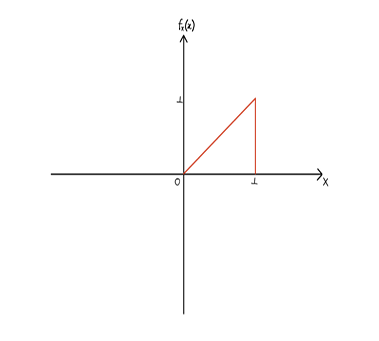

# <p style="text-align: center; color: cyan;" >Solution </p>

# üîç **Analysis of Distribution Transformations** üìä

---

## **Problem Context**:
We are given:
1. $ U \sim U(0,1) $: A uniform random variable on [0,1].
2. $ Y $: Obtained by applying the **inverse CDF** of distribution $ X $ to $ U $.  
   - **Goal**: Determine the distribution of $ Y $ in the following cases:  
     - **Case a**: $ X \sim \text{Exponential}(\lambda) $  
     - **Case b**: $ X $ has a triangular PDF with a peak at 1.

---

## **Case a: $ X \sim \text{Exponential}(\lambda) $**

### üî¢ **Exponential CDF and Inverse CDF**:
- **CDF of $ X $:**  
  $ F(x) = 1 - e^{-\lambda x} $ for $ x \geq 0 $.  
- **Inverse CDF (Quantile Function):**  
  $ F^{-1}(u) = -\frac{\ln(1-u)}{\lambda} $.  

### üîÑ **Transformation**:
When $ U \sim U(0,1) $:  
$ Y = F^{-1}(U) = -\frac{\ln(1-U)}{\lambda} $.  

### üåü **Result**:
Using the theorem that $ Y = F^{-1}(U) $ follows the same distribution as $ X $:  
- **Conclusion:**  
  $ Y \sim \text{Exponential}(\lambda) $.  

---

## **Case b: $ X $ with a Triangular PDF**

### üìà **PDF and CDF of $ X $:**
- **PDF of $ X $:**  
  $ f(x) = 2x $ for $ 0 \leq x \leq 1 $.  
- **CDF of $ X $:**  
  $ F(x) = x^2 $ for $ 0 \leq x \leq 1 $.  

### üî¢ **Inverse CDF**:
- $ F^{-1}(u) = \sqrt{u} $ for $ 0 \leq u \leq 1 $.  

### üîÑ **Transformation**:
When $ U \sim U(0,1) $:  
$ Y = F^{-1}(U) = \sqrt{U} $.  

### üåü **Result**:
- **Conclusion:**  
  $ Y $ follows the same triangular distribution, with **CDF $ F(y) = y^2 $ for $ 0 \leq y \leq 1 $**.

---

## **Final Answer**:
### a) $ Y \sim \text{Exponential}(\lambda) $.  
### b) $ Y $ follows a triangular distribution with CDF $ F(y) = y^2 $ for $ 0 \leq y \leq 1 $.  


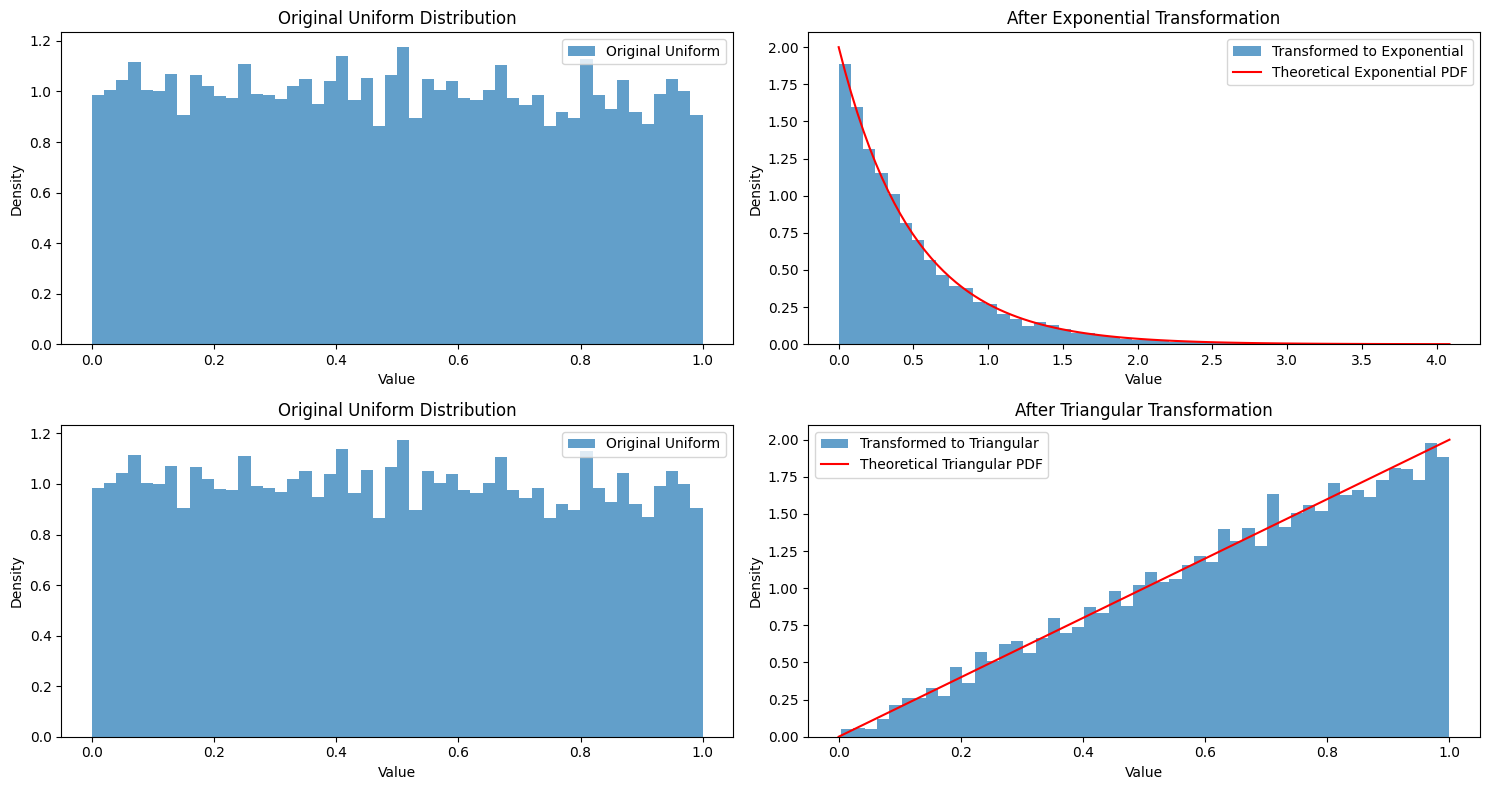

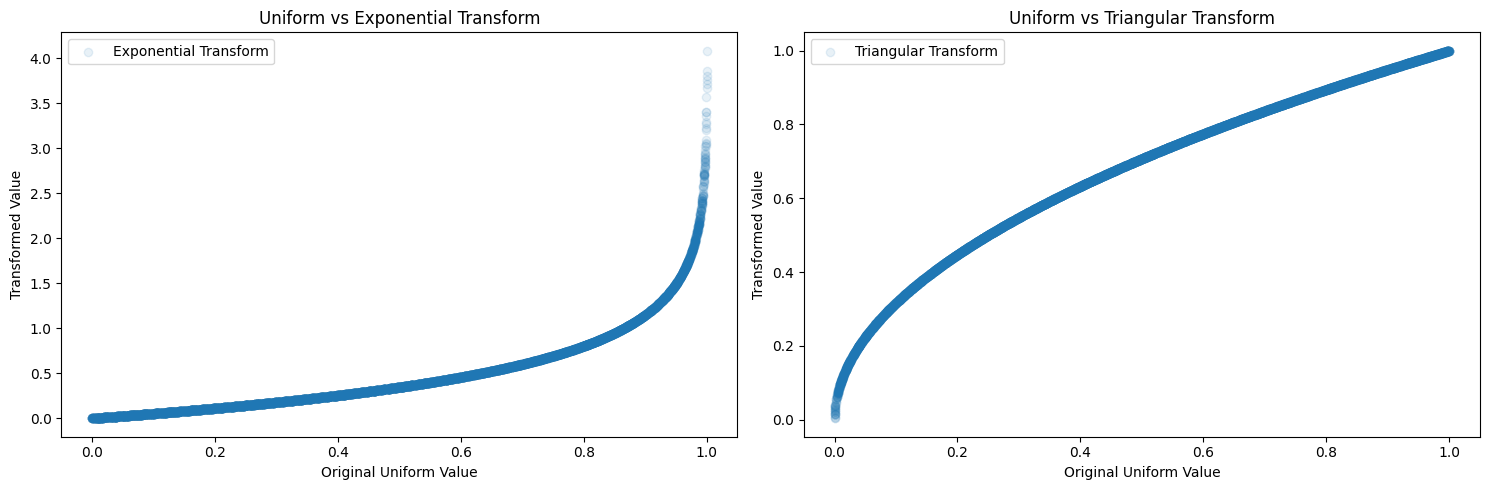


Case A (Exponential) Statistics:
Mean: 0.4887
Variance: 0.2373

Case B (Triangular) Statistics:
Mean: 0.6624
Variance: 0.0554


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 10000

# Generate uniform random numbers between 0 and 1
U = np.random.uniform(0, 1, n_samples)

# Case A: Exponential Distribution
# Inverse CDF of exponential: F^(-1)(u) = -ln(1-u)/Œª
lambda_param = 2
Y_exp = -np.log(1 - U) / lambda_param

# Case B: Triangular Distribution
# Inverse CDF is square root: F^(-1)(u) = ‚àöu
Y_tri = np.sqrt(U)

# Plotting
plt.figure(figsize=(15, 8))

# Plot for Case A: Exponential
plt.subplot(2, 2, 1)
plt.hist(U, bins=50, density=True, alpha=0.7, label='Original Uniform')
plt.title('Original Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(Y_exp, bins=50, density=True, alpha=0.7, label='Transformed to Exponential')
# Plot theoretical exponential PDF
x_exp = np.linspace(0, max(Y_exp), 100)
plt.plot(x_exp, lambda_param * np.exp(-lambda_param * x_exp), 'r-',
         label='Theoretical Exponential PDF')
plt.title('After Exponential Transformation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Plot for Case B: Triangular
plt.subplot(2, 2, 3)
plt.hist(U, bins=50, density=True, alpha=0.7, label='Original Uniform')
plt.title('Original Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(Y_tri, bins=50, density=True, alpha=0.7, label='Transformed to Triangular')
# Plot theoretical triangular PDF
x_tri = np.linspace(0, 1, 100)
plt.plot(x_tri, 2*x_tri, 'r-', label='Theoretical Triangular PDF')
plt.title('After Triangular Transformation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Show scatter plots of original vs transformed values
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(U, Y_exp, alpha=0.1, label='Exponential Transform')
plt.title('Uniform vs Exponential Transform')
plt.xlabel('Original Uniform Value')
plt.ylabel('Transformed Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(U, Y_tri, alpha=0.1, label='Triangular Transform')
plt.title('Uniform vs Triangular Transform')
plt.xlabel('Original Uniform Value')
plt.ylabel('Transformed Value')
plt.legend()

plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nCase A (Exponential) Statistics:")
print(f"Mean: {np.mean(Y_exp):.4f}")
print(f"Variance: {np.var(Y_exp):.4f}")

print("\nCase B (Triangular) Statistics:")
print(f"Mean: {np.mean(Y_tri):.4f}")
print(f"Variance: {np.var(Y_tri):.4f}")